In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
irisDf = pd.read_csv('../datasets/Data_Q2/iris.csv')         #loading data

In [4]:
irisDf = irisDf.rename(columns={'sepal_length': 'sl', 'sepal_width': 'sw' , 'petal_length':'pl' , 'petal_width' : 'pw'})
print(irisDf.head())    

#for ease we hv renamed column names

    sl   sw   pl   pw species
0  5.1  3.5  1.4  0.2  setosa
1  4.9  3.0  1.4  0.2  setosa
2  4.7  3.2  1.3  0.2  setosa
3  4.6  3.1  1.5  0.2  setosa
4  5.0  3.6  1.4  0.2  setosa


In [5]:
irisDf.shape

(150, 5)

In [6]:
irisDf.head()

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
irisDf['species'].value_counts()        # verifying balanced dataset

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [8]:
irisDf.info()       # there are no null values in any feature cell

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sl         150 non-null float64
sw         150 non-null float64
pl         150 non-null float64
pw         150 non-null float64
species    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [9]:
irisDf.describe()          #looking at statistical measures to get insights

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# defining a function to find mean and std dev of all features for given class

meanvector=[]
features_count = irisDf.shape[1]-1

def findMeanVector(df):
    '''find mean vector for features of given dataframe'''
    for i in range(0,features_count):
        mean = df.ix[:,i].mean()
        meanvector.insert(i,mean)
        
    return meanvector

#defining a function to find std dev of all features for given class

stdvector=[]
features_count = irisDf.shape[1]-1

def findStdVector(df):
    '''find std dev vector for features of given dataframe'''
    for i in range(0,features_count):
        std = df.ix[:,i].std()
        stdvector.insert(i,std)
        
    return stdvector


In [11]:
'''
# this cell is just for testing

meanVector0 = findMeanVector(verdf)
#print(meanVector0)   # it is a mean of sl , sw, pl , pw of versicolor flower
 
meanVector1 = findMeanVector(virdf)
#print(meanVector1)   # it is a mean of sl , sw, pl , pw of virginica flower
 
meanVector2 = findMeanVector(setdf)
#print(meanVector2)   # it is a mean of sl , sw, pl , pw of setosa flower
 
stdVector0 = findStdVector(verdf)
#print(stdVector0)   # it is a stddev of sl , sw, pl , pw of versicolor flower
 
stdVector1 = findStdVector(virdf)
#print(stdVector1)   # it is a sd of sl , sw, pl , pw of virginica flower
 
stdVector2 = findStdVector(setdf)
#print(stdVector2)   # it is a sd of sl , sw, pl , pw of setosa flower
 '''

'\n# this cell is just for testing\n\nmeanVector0 = findMeanVector(verdf)\n#print(meanVector0)   # it is a mean of sl , sw, pl , pw of versicolor flower\n \nmeanVector1 = findMeanVector(virdf)\n#print(meanVector1)   # it is a mean of sl , sw, pl , pw of virginica flower\n \nmeanVector2 = findMeanVector(setdf)\n#print(meanVector2)   # it is a mean of sl , sw, pl , pw of setosa flower\n \nstdVector0 = findStdVector(verdf)\n#print(stdVector0)   # it is a stddev of sl , sw, pl , pw of versicolor flower\n \nstdVector1 = findStdVector(virdf)\n#print(stdVector1)   # it is a sd of sl , sw, pl , pw of virginica flower\n \nstdVector2 = findStdVector(setdf)\n#print(stdVector2)   # it is a sd of sl , sw, pl , pw of setosa flower\n '

In [12]:
#gaussain pdf : calculateProbability() function

import math
def calculateProbability(x, mean, stdev):
    '''prob of feature given class label'''
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

def probOfClass(datapt , df):   # means given data point values u find prob of tht point belonging this class
    ''' will return prob of class label given features'''
    pr = 1
    meanVector = findMeanVector(df)
    stdVector = findStdVector(df)
    for i in range(0,4):    # 4 features
        pr *= calculateProbability(datapt.iat[0,i],meanVector[i],stdVector[i])
    return pr

In [13]:
from sklearn.cross_validation import train_test_split

#features = irisDf.values[:,:4]    # till 3rd column means exclusive of 4th coln whch is target
#target = irisDf.values[:,4]       # these are the target values or labels
  
#slicing data
#features_train, features_test, target_train, target_test = train_test_split(features,
#                                                                   target, test_size = 0.33, random_state = 10)

    
# this will give dataframes as output of splitting 
traindf,testdf = train_test_split(irisDf,test_size=0.33)
print(traindf.head())
print(traindf['species'].value_counts())
#len(features_train)

      sl   sw   pl   pw     species
149  5.9  3.0  5.1  1.8   virginica
82   5.8  2.7  3.9  1.2  versicolor
148  6.2  3.4  5.4  2.3   virginica
32   5.2  4.1  1.5  0.1      setosa
56   6.3  3.3  4.7  1.6  versicolor
versicolor    35
virginica     34
setosa        31
Name: species, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
# seperate data by class
virdf = traindf.loc[traindf['species'] == "virginica"]
verdf = traindf.loc[traindf['species'] == "versicolor"]
setdf = traindf.loc[traindf['species'] == "setosa"]

#virdf.head()
testdf.head()

,sl,sw,pl,pw,species
96,5.7,2.9,4.2,1.3,versicolor
51,6.4,3.2,4.5,1.5,versicolor
103,6.3,2.9,5.6,1.8,virginica
30,4.8,3.1,1.6,0.2,setosa
58,6.6,2.9,4.6,1.3,versicolor


In [15]:
# defining a function to predict a class label

def predictClassLabel(datapt):
    '''predicts the class label for given data point'''
    pr_vir = probOfClass(datapt,virdf)
    pr_ver = probOfClass(datapt,verdf)
    pr_set = probOfClass(datapt,setdf)
    
    m = max(pr_vir,pr_ver,pr_set)
    if(m == pr_vir):
        return "virginica"
    elif(m == pr_ver): 
        return "versicolor"
    else: 
        return "setosa"

print(predictClassLabel(testdf.iloc[0:1,0:4]))
#testdf.iloc[1:2,0:5]        #first one is slicing row wise , scnd is slicing coln wise
#testdf.iloc[0]['species']   # to find val at a cell of df : by giving row index and column name respctvly

versicolor


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [16]:
#lets find accuracy : predict class labels for all test instances and then compare both of them

import time

def findAccuracy(testdf):
    '''find accurcay of an algorithm'''
    count =0
    total =0

    for i in range(0,len(testdf)):
        prediction = predictClassLabel(testdf.iloc[i:i+1,0:4])       # taking row by row without label 

        if(prediction == testdf.iloc[i]['species']):            # comparing predicted label with actual label
            count += 1

        total += 1

    return count/total

print(findAccuracy(testdf))

print("accuracy from scratch is same as accracy of sklearn naive bayes algo, which we showed below")

# finding training time

t0 = time.time()
#predictClassLabel(testdf.iloc[0:1,0:4])
print("training time is :" , round(time.time()-t0,3),"seconds")

0.96
accuracy from scratch is same as accracy of sklearn naive bayes algo, which we showed below
training time is : 0.003 seconds


In [17]:
# by plotting below we can see that feature is following gaussian distribution for each class
# we can look for the same using a histogram

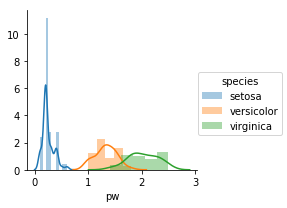

In [18]:
sns.FacetGrid(irisDf, hue="species", size=3) \
   .map(sns.distplot, "pw") \
    .add_legend();
plt.show();                  # here sns.distplot means we are plotting a distribution of petal width
  

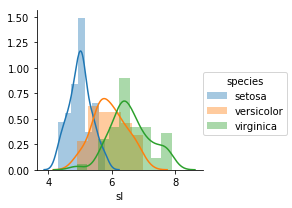

In [19]:
sns.FacetGrid(irisDf, hue="species", size=3) \
   .map(sns.distplot, "sl") \
    .add_legend();
plt.show();                  # here sns.distplot means we are plotting a distribution of sepal length
  

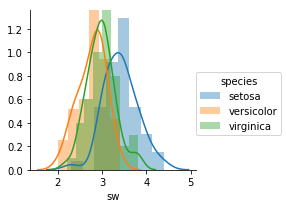

In [20]:
sns.FacetGrid(irisDf, hue="species", size=3) \
   .map(sns.distplot, "sw") \
    .add_legend();
plt.show();                  # here sns.distplot means we are plotting a distribution of sepal width
  

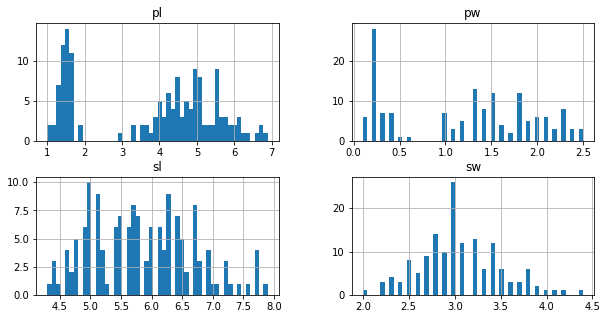

In [21]:
#histogram for whole dataset : this is of no sense as we are not distinguishing

%matplotlib inline
import matplotlib.pyplot as plt
irisDf.hist(bins=50, figsize=(10,5))
plt.show()

In [22]:
from sklearn.cross_validation import train_test_split

# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

In [24]:
features = irisDf.values[:,:4]    # till 3rd column means exclusive of 4th coln whch is target
target = irisDf.values[:,4]       # these are the target values or labels
  
#slicing data
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.33, random_state = 10)

In [25]:
model = GaussianNB()        # so we are using a guassian naive bayes model
model.fit(features_train, target_train)        # trainig the model using training data : features and labels
target_pred = model.predict(features_test)       # predicting labels for test data

In [26]:
accuracy_score(target_test, target_pred, normalize = True)       # evaluation of our algorithm

0.93999999999999995

In [27]:
print(target_pred)

['versicolor' 'virginica' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa'
 'setosa' 'virginica' 'virginica' 'virginica' 'setosa' 'versicolor'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'setosa' 'setosa' 'versicolor'
 'setosa' 'virginica' 'setosa' 'virginica' 'virginica' 'virginica'
 'virginica']


In [66]:
# replacing class labels with values
#irisDf2 = irisDf.replace('versicolor',0).replace('virginica',1).replace('setosa',2) 
#irisDf2['species'].value_counts()